In [1]:
import numpy as np
import pandas as pd
import os
from nltk.corpus import stopwords
import string

In [2]:
test_file = "C:/Users/Sree/Downloads/aclImdb/test"
train_file = "C:/Users/Sree/Downloads/aclImdb/train"

In [3]:
review_list = []
rating_list = []

In [4]:
def review_list_(file,category,review_list,rating_list):
    for i in os.listdir(file+"/"+category):
        review_ = open(file+"/"+category+"/"+i,'r',encoding="ISO-8859-1").read()
        review_ = [c for c in review_ if c not in string.punctuation]
        review_ = ''.join(review_)
        review_ = [ c for c in review_.split() if c.lower() not in stopwords.words("english")]
        review_ = ' '.join(review_)
        review_list.append(review_)
        if category is "neg":
            rating_list.append(0)
        else:
            rating_list.append(1)
        
        
        
        
        

In [5]:
for j in [test_file,train_file]:
    for i in ["pos","neg"]:
        review_list_(j,i,review_list,rating_list)
        

In [6]:
reviews = pd.DataFrame(columns = ["review","rating"])

In [7]:
reviews["review"] = review_list
reviews["rating"] = rating_list

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [9]:
bowtransform =CountVectorizer()
bowtransform.fit(reviews["review"])
msg_bow = bowtransform.transform(reviews["review"])


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(msg_bow.toarray(),reviews["rating"],test_size=0.5)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from sklearn.svm import LinearSVC

In [42]:
list_ = list(y_test)

In [45]:
for c in [0.01,0.1,1, 10, 100, 1000]:
    svc = LinearSVC(C = c)
    svc.fit(X_train,y_train)
    prediction = svc.predict(X_test)
    
    i = 0
    for j in range(len(prediction)):
        if prediction[j] == list_[j]:
            i = i+1
    print(str(c) + "  score = " +str(i/len(prediction)))
    
    
    
    

0.01  score = 0.8626373626373627
0.1  score = 0.8566433566433567
1  score = 0.8526473526473527
10  score = 0.8476523476523476
100  score = 0.8476523476523476
1000  score = 0.8476523476523476


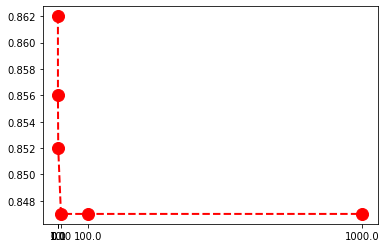

In [53]:
plt.xticks(ticks = [0.01,0.1,1, 10, 100, 1000])
plt.plot([0.01,0.1,1, 10, 100, 1000],[0.862,0.856,0.852,0.847,0.847, 0.847],color='red', marker='o', linestyle='dashed', \
         linewidth=2, markersize=12)

0